In [1]:
import pandas as pd
import numpy as np
import warnings
import random
import rasterio as rio
from rasterio.plot import show
import torch
from glob import glob

In [2]:
csv_small = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/imagepath1000.csv'
csv = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/neighbor_pairs/imagepathfull2.csv'

In [3]:
df = pd.read_csv(csv, header=0)
print(len(df.index))
df.head()

136963


,path
0,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...
1,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...
2,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...
3,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...
4,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...


In [5]:
img_path = df.iloc[0]['path']
print(img_path)

img_src = rio.open(img_path)
print(img_src)


/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo28/0000025088-0000010752.tif
<open DatasetReader name='/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo28/0000025088-0000010752.tif' mode='r'>


In [6]:

print(img_src.bounds)
bounds = img_src.bounds
print(bounds)
print(bounds.left)

x = (bounds.left + bounds.right) / 2
print(x)

y = (bounds.top + bounds.bottom) / 2
print(y)

BoundingBox(left=39.82429283864345, bottom=-3.582122026955004, right=39.88465962573628, top=-3.521755239862172)
BoundingBox(left=39.82429283864345, bottom=-3.582122026955004, right=39.88465962573628, top=-3.521755239862172)
39.82429283864345
39.85447623218987
-3.551938633408588


In [21]:
lat_list = []
lon_list = []

path_len = len(df.index)
for i, path in enumerate(df['path']):

    img_src = rio.open(path)
    bounds = img_src.bounds

    lat = (bounds.top + bounds.bottom) / 2
    lon = (bounds.left + bounds.right) / 2

    lat_list.append(lat)
    lon_list.append(lon)

    if i % 1000 == 0:
        print(i, " / ", path_len)



0  /  136963
1000  /  136963
2000  /  136963
3000  /  136963
4000  /  136963
5000  /  136963
6000  /  136963
7000  /  136963
8000  /  136963
9000  /  136963
10000  /  136963
11000  /  136963
12000  /  136963
13000  /  136963
14000  /  136963
15000  /  136963
16000  /  136963
17000  /  136963
18000  /  136963
19000  /  136963
20000  /  136963
21000  /  136963
22000  /  136963
23000  /  136963
24000  /  136963
25000  /  136963
26000  /  136963
27000  /  136963
28000  /  136963
29000  /  136963
30000  /  136963
31000  /  136963
32000  /  136963
33000  /  136963
34000  /  136963
35000  /  136963
36000  /  136963
37000  /  136963
38000  /  136963
39000  /  136963
40000  /  136963
41000  /  136963
42000  /  136963
43000  /  136963
44000  /  136963
45000  /  136963
46000  /  136963
47000  /  136963
48000  /  136963
49000  /  136963
50000  /  136963
51000  /  136963
52000  /  136963
53000  /  136963
54000  /  136963
55000  /  136963
56000  /  136963
57000  /  136963
58000  /  136963
59000  /  

In [ ]:
len(lon_list)

1000

In [22]:
df['lat'] = lat_list
df['lon'] = lon_list

In [23]:
df.to_csv('imagepaths_lat_lon.csv')

In [2]:
!pip install geopandas descartes pygeos cartopy geoplot
#!pip install desc

  Using cached pygeos-0.12.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached Cartopy-0.20.2.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /cephyr/NOBACKUP/groups/globalpoverty1/geo1/bin/python3 /cephyr/NOBACKUP/groups/globalpoverty1/geo1/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmp6p7j2hvl
       cwd: /tmp/pip-install-sic3r95c/cartopy
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
ERROR: Command errored out with exit status 1: /cephyr/NOBACKUP/groups/globalpoverty1/geo1/bin/python3 /cephyr/NOBACKUP/groups/globalpoverty1/geo1/lib/python3.8/site-packages/pip/_vendor/pep517/_in_pr

In [7]:
df = pd.read_csv('/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/neighbor_pairs/imagepaths_lat_lon2.csv')

df.head()

,path,lat,lon
0,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-3.551939,39.854476
1,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.967674,43.174650
2,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,1.458505,42.389881
3,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-2.103136,37.137971
4,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.846941,44.019785


In [8]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

deg_to_km = 111
km_to_deg = 1/deg_to_km

radius_km = 10
neighbor_radius = radius_km * km_to_deg
print(neighbor_radius)

df = pd.read_csv('imagepaths_lat_lon2.csv')



locs = df[['lat', 'lon']].values
locs_1000 = df.iloc[:1000][['lat', 'lon']].values

df.head()

0.09009009009009009


,path,lat,lon
0,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-3.551939,39.854476
1,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.967674,43.174650
2,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,1.458505,42.389881
3,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-2.103136,37.137971
4,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.846941,44.019785


In [51]:
neighbors_list = [[] for i in range(len(df.index))]
#neighbors_arr = np.empty(len(df.index))



for i, loc in enumerate(locs):
    # Calculate distance to all other points (efficiently)
    dists = cdist([loc], locs)

    # Find indices of neighbors
    neighbors = np.where(dists[0] < neighbor_radius)[0]

    # Remove self as neighbor
    neighbors = np.delete(neighbors, np.where(neighbors == i))

    # Add to neighbor list
    neighbors_list[i] = neighbors #[0]

    #if is_neighbor(i_lat, i_lon, row_j['lat'], row_j['lon']):
    #    neighbors_list[i].append(j)
    
    #break

In [77]:
n_neighbors = [len(x) for x in neighbors_list]

print("Points having no neighbors: ", len(np.where(np.array(n_neighbors) == 0)[0]))
print("Min amount of neighbors: ", min(n_neighbors))
print("Max amount of neighbors: ", max(n_neighbors))
print("Mean number of neighbors: ", np.mean(n_neighbors))



Points having no neighbors:  3236
Min amount of neighbors:  0
Max amount of neighbors:  23
Mean number of neighbors:  6.189876097924257


In [76]:
df['neighbors'] = neighbors_list
df.head()

,path,lat,lon,neighbors
0,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-3.551939,39.854476,"[330, 907, 1253, 1303, 1314]"
1,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.967674,43.174650,"[40, 557, 53137, 54518, 55081]"
2,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,1.458505,42.389881,"[211, 686, 733, 875, 927, 1298, 1378]"
3,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-2.103136,37.137971,"[88, 36851]"
4,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.846941,44.019785,"[365, 426, 571, 598, 926]"


In [79]:
#df.to_csv('imagepaths_neighbors.csv', index=False)

In [10]:
radii_km = range(5, 16)
radii = [x * km_to_deg for x in radii_km]



neighbors_list_r = [[[] for i in range(len(radii))] for i in range(len(df.index)) ]
np.shape(neighbors_list_r)

for i, loc in enumerate(locs):
    # Calculate distance to all other points (efficiently)
    dists = cdist([loc], locs)

    # Find indices of neighbors
    r_neighbors = [[] for i in range(len(radii))]
    for j, radius in enumerate(radii):
        r_neighbors[j] = np.where(dists[0] < radius)[0]

        # Remove self as neighbor
        r_neighbors[j] = np.delete(r_neighbors[j], np.where(r_neighbors[j] == i))

    # Add to neighbor list
    neighbors_list_r[i] = r_neighbors #[0]


In [11]:
neighbors_arr = np.array(neighbors_list_r).transpose(1,0)

print(np.shape(neighbors_arr[10][0]))

(9,)


<ipython-input-11-871d45f9e2dd>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  neighbors_arr = np.array(neighbors_list_r).transpose(1,0)


In [12]:
df_all_neighbors = df.copy()

no_neighbors = []
min_neighbors = []
max_neighbors = []
mean_neighbors = []

for i, neighbors_list in enumerate(neighbors_arr):

    n_neighbors = [len(x) for x in neighbors_list]
    
    no_neighbors.append(len(np.where(np.array(n_neighbors) == 0)[0]))
    min_neighbors.append(min(n_neighbors))
    max_neighbors.append(max(n_neighbors))
    mean_neighbors.append(np.mean(n_neighbors))


    print("RADIUS: ", i+5)
    print("Points having no neighbors: ", len(np.where(np.array(n_neighbors) == 0)[0]))
    print("Min amount of neighbors: ", min(n_neighbors))
    print("Max amount of neighbors: ", max(n_neighbors))
    print("Mean number of neighbors: ", np.mean(n_neighbors))
    print()

    column = 'neighbors_' + str(radii_km[i])

    df_all_neighbors[column] = neighbors_list

df_all_neighbors.to_csv('imagepaths_all_neighbors.csv', index=False)

RADIUS:  5
Points having no neighbors:  125475
Min amount of neighbors:  0
Max amount of neighbors:  4
Mean number of neighbors:  0.13121792016822062

RADIUS:  6
Points having no neighbors:  124645
Min amount of neighbors:  0
Max amount of neighbors:  6
Mean number of neighbors:  0.19013894263414208

RADIUS:  7
Points having no neighbors:  4607
Min amount of neighbors:  0
Max amount of neighbors:  11
Mean number of neighbors:  3.2564707256704364

RADIUS:  8
Points having no neighbors:  4603
Min amount of neighbors:  0
Max amount of neighbors:  13
Mean number of neighbors:  3.3074772018720386

RADIUS:  9
Points having no neighbors:  4602
Min amount of neighbors:  0
Max amount of neighbors:  17
Mean number of neighbors:  3.37099800676095

RADIUS:  10
Points having no neighbors:  3236
Min amount of neighbors:  0
Max amount of neighbors:  23
Mean number of neighbors:  6.189876097924257

RADIUS:  11
Points having no neighbors:  3234
Min amount of neighbors:  0
Max amount of neighbors:  25
M

# Dataset testing

In [2]:
csv_neighbors = '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/neighbor_pairs/imagepaths_all_neighbors.csv'
df = pd.read_csv(csv_neighbors)
df.head()

,path,lat,lon,neighbors_5,neighbors_6,neighbors_7,neighbors_8,neighbors_9,neighbors_10,neighbors_11,neighbors_12,neighbors_13,neighbors_14,neighbors_15
0,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-3.551939,39.854476,[],[],[ 330 1253 1314],[ 330 1253 1314],[ 330 1253 1314],[ 330 907 1253 1303 1314],[ 330 907 1253 1303 1314],[ 330 907 1253 1303 1314],[ 330 907 1253 1303 1314],[ 330 907 1018 1253 1303 1314],[ 152 309 330 560 907 1018 1253 1303 1314]
1,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.967674,43.174650,[54518],[54518],[ 40 53137 54518 55081],[ 40 53137 54518 55081],[ 40 53137 54518 55081],[ 40 557 53137 54518 55081],[ 40 557 53137 54518 55081],[ 40 557 53137 54518 55081 55784],[ 40 557 52356 53137 54518 55081 55784],[ 40 557 52356 53137 54518 55081 55784],[ 40 557 727 52356 53137 54518 55081 55784]
2,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,1.458505,42.389881,[],[],[ 211 686 875 1298],[ 211 686 875 1298],[ 211 686 875 1298],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 117 211 686 725 733 875 927 1298 1378]
3,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-2.103136,37.137971,[36851],[36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 1258 36688 36851],[ 88 851 1258 36688 36851]
4,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.846941,44.019785,[],[],[365 926],[365 926],[365 926],[365 426 571 598 926],[ 365 426 571 598 926 52685],[ 365 426 571 598 926 52685 106...,[ 365 426 571 598 926 52685 54...,[ 259 365 426 571 598 795 ...,[ 259 365 426 571 598 795 ...


In [4]:

neighbors_10 = df['neighbors_10']
neighbors_10.head()


ind = neighbors_10.where(neighbors_10 == '[]')

print(ind)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
136958    NaN
136959    NaN
136960    NaN
136961    NaN
136962    NaN
Name: neighbors_10, Length: 136963, dtype: object


In [4]:
test = neighbors_10.iloc[10]
split = test.split( )
print(split)
ind_list = [int(ind) for ind in split[1:-1]]
print(split[-1][:-1])
ind_list.append(int(split[-1][:-1]))
ind_list


['[', '193', '515', '712', '775', '1264', '1329]']
1329


[193, 515, 712, 775, 1264, 1329]

In [5]:
neighbor_list = []

for i, row in enumerate(neighbors_10):
    split = row.split( )
    #print(split)

    ind_list = [int(ind) for ind in split[1:-1]]
    
    last_ind = split[-1]
    if last_ind == '[]':
        ind_list.append([])
    else:
        #print("last_ind: ", last_ind)
        last_ind = last_ind.replace('[', '')
        last_ind = last_ind.replace(']', '')
        #print("last_ind after replace: ", last_ind, "index: ", i)
        ind_list.append(int(last_ind))


    neighbor_list.append(ind_list)
    
    #print(row)
    #print(ind_list)
    #print(neighbor_list)
    
    #if i >= 3:
    #    break

In [7]:
neighbor_list[10000]

[7869, 8741, 9461, 9840, 9852, 9919, 11226, 13623]

In [ ]:
!ml load torchvision/0.9.1-fosscuda-2020b-PyTorch-1.8.1
!pip install torchvision

In [189]:
aug_moco = A.Compose([
            A.RandomResizedCrop(224, 224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
            A.GaussianBlur(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            ToTensorV2()
        ])

In [6]:
import sys
import importlib
import albumentations as A
from albumentations.pytorch import ToTensorV2
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.insert(0, '/cephyr/NOBACKUP/groups/globalpoverty1/JesperBenjamin/geography-aware-ssl/moco_fmow/moco')
from ms_nl_resnet import MS_NL_ResNet18
import fmow_dataloader 
importlib.reload(fmow_dataloader)
from fmow_dataloader import CustomDatasetFromImagesSpatioTemporal

/cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: /cephyr/users/benvin/Alvis/.local/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c106IValue23reportToTensorTypeErrorEv
  warn(f"Failed to load image Python extension: {e}")


In [228]:
aug = A.Compose([
            ToTensorV2()
        ])

aug_moco = A.Compose([
            A.RandomResizedCrop(224, 224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
            A.GaussianBlur(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            ToTensorV2()
        ])

dataset = fmow_dataloader.CustomDatasetFromImagesSpatioTemporal(csv_neighbors,
    transform=aug, temporal=True, spatial=True, spatial_radius=10)
loader = torch.utils.data.DataLoader(
        dataset, batch_size=32, shuffle=True)

In [229]:

for i, (images, labels) in enumerate(loader):
    print(type(images))
    #print(images)
    images[0].size()
    
    break

rerolled index:  10184
new index:  64902
64902  neighbors:  (7,)
76209  neighbors:  (2,)
79011  neighbors:  (4,)
34726  neighbors:  (9,)
5702  neighbors:  (6,)
66227  neighbors:  (5,)
44333  neighbors:  (2,)
80170  neighbors:  (3,)
9597  neighbors:  (1,)
41744  neighbors:  (7,)
rerolled index:  53190
new index:  22174
22174  neighbors:  (7,)
26471  neighbors:  (8,)
70500  neighbors:  (2,)
84086  neighbors:  (9,)
85395  neighbors:  (7,)
131714  neighbors:  (7,)
11083  neighbors:  (5,)
106314  neighbors:  (1,)
48777  neighbors:  (5,)
60669  neighbors:  (7,)
92868  neighbors:  (4,)
8704  neighbors:  (1,)
104395  neighbors:  (4,)
94119  neighbors:  (3,)
12215  neighbors:  (8,)
110832  neighbors:  (7,)
101050  neighbors:  (8,)
26652  neighbors:  (2,)
77310  neighbors:  (7,)
69962  neighbors:  (1,)
68992  neighbors:  (5,)
4271  neighbors:  (7,)
<class 'list'>


In [153]:
# 105816
# 70341
# 44345
print(len(neighbors_10[44345]))

neighbors_10[44345] == '[]'


2


True

In [157]:
index = 44345
while neighbors_10[index] == '[]':
    print('rerolled index: ', index)
    index = np.random.randint(len(neighbors_10.index))
    print('new index: ', index)

print(len(neighbors_10[index]))
print(neighbors_10[index])

rerolled index:  44345
new index:  65094
49
[63448 64939 65294 66063 66534 66772 67662 69010]


In [230]:
idx = 0

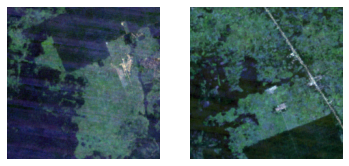

In [249]:

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.axis('off')
ax2.axis('off')
show(images[0][idx].detach().numpy()[(2,1,0),:,:], adjust=True, ax=ax1)

show(images[1][idx].detach().numpy()[(2,1,0),:,:], adjust=True, ax=ax2)
idx += 1

In [196]:
df = pd.read_csv(csv_neighbors, header=0)
df.head()

,path,lat,lon,neighbors_5,neighbors_6,neighbors_7,neighbors_8,neighbors_9,neighbors_10,neighbors_11,neighbors_12,neighbors_13,neighbors_14,neighbors_15
0,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-3.551939,39.854476,[],[],[ 330 1253 1314],[ 330 1253 1314],[ 330 1253 1314],[ 330 907 1253 1303 1314],[ 330 907 1253 1303 1314],[ 330 907 1253 1303 1314],[ 330 907 1253 1303 1314],[ 330 907 1018 1253 1303 1314],[ 152 309 330 560 907 1018 1253 1303 1314]
1,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.967674,43.174650,[54518],[54518],[ 40 53137 54518 55081],[ 40 53137 54518 55081],[ 40 53137 54518 55081],[ 40 557 53137 54518 55081],[ 40 557 53137 54518 55081],[ 40 557 53137 54518 55081 55784],[ 40 557 52356 53137 54518 55081 55784],[ 40 557 52356 53137 54518 55081 55784],[ 40 557 727 52356 53137 54518 55081 55784]
2,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,1.458505,42.389881,[],[],[ 211 686 875 1298],[ 211 686 875 1298],[ 211 686 875 1298],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 211 686 733 875 927 1298 1378],[ 117 211 686 725 733 875 927 1298 1378]
3,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,-2.103136,37.137971,[36851],[36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 36851],[ 88 1258 36688 36851],[ 88 851 1258 36688 36851]
4,/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei...,2.846941,44.019785,[],[],[365 926],[365 926],[365 926],[365 426 571 598 926],[ 365 426 571 598 926 52685],[ 365 426 571 598 926 52685 106...,[ 365 426 571 598 926 52685 54...,[ 259 365 426 571 598 795 ...,[ 259 365 426 571 598 795 ...


In [33]:
asd = df['path'].to_numpy()
asd

array(['/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo28/0000025088-0000010752.tif',
       '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo28/0000000896-0000023072.tif',
       '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo28/0000006496-0000020160.tif',
       ...,
       '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo18/0000011200-0000003136.tif',
       '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo18/0000009408-0000008064.tif',
       '/cephyr/NOBACKUP/groups/globalpoverty1/Kakooei/DatasetAfricaPoverty/TenYears/Geo18/0000032928-0000016576.tif'],
      dtype=object)

# Plot augmentation images for report

In [7]:
import albumentations as A


aug = A.Compose([
            ToTensorV2()
        ])

aug_moco = A.Compose([
            A.RandomResizedCrop(224, 224, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
            A.GaussianBlur(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            ToTensorV2()
        ])

aug_dataset = fmow_dataloader.CustomDatasetFromImagesSpatioTemporal(csv,
    transform=aug, temporal=False, spatial=False)
aug_loader = torch.utils.data.DataLoader(
        aug_dataset, batch_size=32, shuffle=True)

In [ ]:

for i, (images, labels) in enumerate(loader):
    print(type(images))
    #print(images)
    images[0].size()
    
    break

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.axis('off')
ax2.axis('off')
show(images[0][idx].detach().numpy()[(2,1,0),:,:], adjust=True, ax=ax1)

show(images[1][idx].detach().numpy()[(2,1,0),:,:], adjust=True, ax=ax2)
idx += 1